Import Library dan dataset


In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "/content/ebay_mens_perfume.csv"
data = pd.read_csv(file_path)

Menampilkan Data 5 Teratas

In [156]:
data.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States"
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada"
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States"
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States"
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States"


Melihat info Dataset

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              999 non-null    object 
 1   title              1000 non-null   object 
 2   type               997 non-null    object 
 3   price              1000 non-null   float64
 4   priceWithCurrency  1000 non-null   object 
 5   available          889 non-null    float64
 6   availableText      997 non-null    object 
 7   sold               994 non-null    float64
 8   lastUpdated        947 non-null    object 
 9   itemLocation       1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.3+ KB


Melihat apakah ada data yang hilang/missing.

Ternyata ada data yang hilang seperti:
Kolom brand sebanyak 1 baris
Kolom type sebanyak 3 baris
Kolom available sebanyak 111 baris
Kolom availableText sebanyak 3 baris
Kolom sold sebanyak 6 baris
Kolom lastUpdated sebanyak 53 baris

In [158]:
data.isna().sum()

,0
brand,1
title,0
type,3
price,0
priceWithCurrency,0
available,111
availableText,3
sold,6
lastUpdated,53
itemLocation,0


Melihat apakah ada data yang duplikat

In [159]:
print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  0


In [160]:
data.describe()

,price,available,sold
count,1000.000000,889.000000,994.000000
mean,46.481200,20.046119,766.266600
std,35.527862,61.547985,3200.971733
min,3.000000,2.000000,1.000000
25%,22.990000,5.000000,14.000000
50%,35.710000,10.000000,49.500000
75%,59.000000,10.000000,320.500000
max,259.090000,842.000000,54052.000000


Melihat data kolom available dan menampilkan yang terbanyak yang akan digunakan untuk mengisi baris kolom available yang hilang/missing

In [161]:
data.available.value_counts()

,count
available,
10.0,341
3.0,109
5.0,62
2.0,55
4.0,46
...,...
202.0,1
311.0,1
161.0,1


Melihat baris kolom available yang hilang/missing

In [162]:
data[data.available.isna()]

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States"
7,Unbranded,Parfums De-Marly-Haltane Eau de Parfum spray 4...,Eau de Parfum,85.00,US $85.00,NaN,Last One / 6 sold,6.0,"May 24, 2024 00:10:39 PDT","Ithaca, New York, United States"
20,Dolce & Gabbana,Light Blue by Dolce & Gabbana 4.2 oz Cologne f...,Eau de Toilette,29.94,US $29.94/ea,NaN,"Limited quantity available / 9,208 sold",9208.0,"May 23, 2024 20:04:11 PDT","Hackensack, New Jersey, United States"
29,Penhaligon's,Penhaligon's The Tragedy of Lord George 2.5oz ...,Eau de Parfum,99.99,US $99.99,NaN,Last One / 30 sold,30.0,"May 20, 2024 04:16:27 PDT","Brenham, Texas, United States"
36,Rasasi,Rasasi Men's Hawas EDP Spray 3.4 oz Fragrances...,Eau de Parfum,45.11,US $45.11,NaN,Limited quantity available / 258 sold,258.0,"May 24, 2024 09:50:28 PDT","Brooklyn, New York, United States"
...,...,...,...,...,...,...,...,...,...,...
920,Elizabeth Taylor,Elizabeth Taylor PASSION Cologne Spray for Men...,Eau de Cologne,17.17,US $17.17,NaN,Last One / 4 sold,4.0,"May 24, 2024 07:15:49 PDT","Ontario, California, United States"
922,Gucci,Gucci Guilty Black 3.0 oz EDT Cologne for Men ...,Eau de Toilette,68.30,US $68.30,NaN,Limited quantity available / 137 sold,137.0,"May 24, 2024 07:59:03 PDT","Hackensack, New Jersey, United States"
925,Bath & Body Works,Bath & Body Works Men's Collection Fragrance C...,Body Spray,10.91,US $10.91,NaN,Last One / 654 sold,654.0,"May 16, 2024 00:14:43 PDT","Modesto, California, United States"
934,Cologne,New 10x New Random Unique Men's Fragrance Colo...,Perfume,19.90,US $19.90,NaN,More than 10 lots available (10 items per lot)...,331.0,"Nov 21, 2023 08:32:55 PST","Stony Brook, New York, United States"


Mengisi baris kolom available dengan nilai 10

In [163]:
data.available.fillna(value=10, inplace=True)

<ipython-input-163-d3a5e8946887>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.available.fillna(value=10, inplace=True)


Mengecek apakah masih ada yang missing di kolom available

In [164]:
data[data.available.isna()]

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation


Melihat baris kolom brand yang missing

In [165]:
data[data.brand.isna()]

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
567,NaN,Versace Pour Homme Oud Noir 3.4 oz EDP Cologne...,Eau de Parfum,55.16,US $55.16/ea,10.0,"Limited quantity available / 3,110 sold",3110.0,"May 24, 2024 07:53:50 PDT","Hackensack, New Jersey, United States"


Melihat Nama brand yang paling banyak yang akan digunakan untuk mengisi barsi kolom Brand yang missing

In [166]:
data.brand.value_counts()

,count
brand,
Giorgio Armani,60
Paco Rabanne,45
Ralph Lauren,41
Unbranded,39
Armaf,34
...,...
Ulric de Varens,1
KING OF KINGS,1
MONT BLANC LEGEND,1


Mengisi baris kolom brand yang missing dengan nilai "Giorgio Armani" dan mengecek apakah masih ada baris kolom Brand yang missing

In [167]:
data.brand.fillna(value = "Giorgio Armani", inplace = True)
data[data.brand.isna()]

<ipython-input-167-5c965cc047b7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.brand.fillna(value = "Giorgio Armani", inplace = True)


,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation


Melihat baris kolom Type yang missing

In [168]:
data[data.type.isna()]

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
81,Calvin Klein,Ck One by Calvin Klein Cologne Perfume Unisex ...,NaN,23.89,US $23.89/ea,10.0,"Limited quantity available / 54,052 sold",54052.0,"May 24, 2024 03:59:39 PDT","Hackensack, New Jersey, United States"
138,AS SHOW,Bleu De Eau de parfum EDP 100ml 3.4 oz Cologne...,NaN,89.99,US $89.99,5.0,5 available / 5 sold,5.0,"May 14, 2024 20:43:05 PDT","New York,United States, Hong Kong"
606,Milestone Perfumes,Intimation By Milestone Eau de Parfum 3.4 oz Men,NaN,19.89,US $19.89,10.0,More than 10 available / 21 sold,21.0,"May 24, 2024 10:13:17 PDT","Miami, Florida, United States"


Melihat Type Parfum yang paling banyak yang akan digunakan untuk mengisi baris kolome Type yang missing

In [169]:
data.type.value_counts()

,count
type,
Eau de Toilette,444
Eau de Parfum,285
Eau de Cologne,56
Perfume,50
Fragrances,32
...,...
Extrait de Parfum,1
Editions Parfums,1
DIOR HOMME COLOGNE,1


Mengisi baris Kolom Type yang missing dengan nilai "Eau de Toilette" dan mengecek apakah masih ada baris kolom type yang missing

In [170]:
data.type.fillna(value = "Eau de Toilette", inplace = True)
data[data.type.isna()]

<ipython-input-170-2dd649027bc7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.type.fillna(value = "Eau de Toilette", inplace = True)


,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation


Melihat baris kolom availableText yang missing

In [171]:
data[data.availableText.isna()]

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
405,Jean Paul Gaultier,Jean Paul Gaultier Le Beau Le Parfum Eau De Pa...,Eau de Parfum,169.00,US $169.00,10.0,NaN,NaN,NaN,"Winter Haven, Florida, United States"
686,CHANEL,CHANEL Allure Homme Sport 3.4 Oz Men Eau De To...,Eau de Toilette,89.97,US $89.97,10.0,NaN,NaN,NaN,"Lakewood, California, United States"
899,Bvlgari,Bvlgari Le Gemme Tygar 3.4oz Men's Eau de Parfum,Eau de Parfum,250.00,US $250.00,10.0,NaN,NaN,NaN,"Paterson, New Jersey, United States"


melihat availableText yang paling banyak muncul yang akan digunakan untuk mengisi baris kolom availableText yang missing

In [172]:
data.availableText.value_counts()

,count
availableText,
More than 10 available / 16 sold,8
More than 10 available / 17 sold,7
More than 10 available / 12 sold,7
More than 10 available / 9 sold,6
2 available / 3 sold,6
...,...
3 available / 21 sold,1
More than 10 available / 427 sold,1
"487 available / 7,592 sold",1


mengisi baris kolom availableText yang missing dengan nilai "More than 10 available / 16 sold" dan mengecek apakah masih ada baris kolom availableText yang missing

In [173]:
data.availableText.fillna(value="More than 10 available / 16 sold", inplace=True)
data[data.availableText.isna()]

<ipython-input-173-ee0b860e6a22>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.availableText.fillna(value="More than 10 available / 16 sold", inplace=True)


,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation


Melihat baris kolom sold yang missing

In [174]:
data[data.sold.isna()]

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
152,Dossier,Dossier Aromatic Pineapple Eau de Parfum. Size...,Eau de Parfum,20.00,US $20.00/ea,10.0,More than 10 available,NaN,NaN,"Los Angeles, California, United States"
405,Jean Paul Gaultier,Jean Paul Gaultier Le Beau Le Parfum Eau De Pa...,Eau de Parfum,169.00,US $169.00,10.0,More than 10 available / 16 sold,NaN,NaN,"Winter Haven, Florida, United States"
686,CHANEL,CHANEL Allure Homme Sport 3.4 Oz Men Eau De To...,Eau de Toilette,89.97,US $89.97,10.0,More than 10 available / 16 sold,NaN,NaN,"Lakewood, California, United States"
792,Bath & Body Works,Bath & Body Works Men's Collection FRESHWATER ...,Cologne,29.97,US $29.97,4.0,4 available,NaN,NaN,"Dover, Delaware, United States"
797,Tom Ford,"5 Original M&H Tom Ford Impressions, Tobacco V...",Fragrance Oil,29.99,US $29.99/ea,10.0,10 available,NaN,NaN,"St. George, Utah, United States"
899,Bvlgari,Bvlgari Le Gemme Tygar 3.4oz Men's Eau de Parfum,Eau de Parfum,250.00,US $250.00,10.0,More than 10 available / 16 sold,NaN,NaN,"Paterson, New Jersey, United States"


Melihat nilai kolom sold yang paling banyak muncul yang akan digunakan untuk mengisi baris kolom Sold yang missing

In [175]:
data.sold.value_counts()

,count
sold,
8.0,25
4.0,25
3.0,24
5.0,22
16.0,18
...,...
1630.0,1
1787.0,1
124.0,1


Mengisi baris kolom sold yang missing dengan nilai 8 dan mengecek apakah masih ada baris kolom sold yang missing

In [176]:
data.sold.fillna(value=8, inplace = True)
data[data.sold.isna()]

<ipython-input-176-9eb0e361f7a9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.sold.fillna(value=8, inplace = True)


,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation


Melihat baris kolom lastUpdated yang missing

In [177]:
data[data.lastUpdated.isna()]

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
27,Azzaro,Azzaro The Most Wanted 3.38 oz./100 ml. PARFUM...,Eau de Parfum,87.99,US $87.99,2.0,2 available / 4 sold,4.0,NaN,"NEW YORK, United States"
72,Ralph Lauren,New & Sealed! Polo Black by Ralph Lauren 2.5 o...,Eau de Toilette,22.50,US $22.50,10.0,More than 10 available / 2 sold,2.0,NaN,"Mesa, Arizona, United States"
127,Dossier,Dossier Citrus Ginger Eau de Parfum. Size: 50m...,Eau de Parfum,20.00,US $20.00/ea,8.0,8 available / 23 sold,23.0,NaN,"Los Angeles, California, United States"
147,Unbranded,12 Piece Mixed Men’s Cologne Lot: Assorted sce...,Perfume,48.00,US $48.00,10.0,More than 10 available / 7 sold,7.0,NaN,"Webster, Florida, United States"
152,Dossier,Dossier Aromatic Pineapple Eau de Parfum. Size...,Eau de Parfum,20.00,US $20.00/ea,10.0,More than 10 available,8.0,NaN,"Los Angeles, California, United States"
177,Bath & Body Works,OCEAN Cologne Bath & Body Works 3.4 Oz 100 ml ...,Eau de Cologne,28.95,US $28.95,10.0,Last One / 5 sold,5.0,NaN,"Chesapeake, Virginia, United States"
213,Bath & Body Works,MAHOGANY TEAKWOOD Cologne 3.4oz Spray Collecti...,Eau de Cologne,35.68,US $35.68/ea,9.0,9 available / 12 sold,12.0,NaN,"Chesapeake, Virginia, United States"
280,Dolce & Gabbana,D&G DOLCE & GABBANA THE ONE FOR MEN EDT INTENS...,"Eau De Toilette, Eau De Parfum, Eau De Parfum ...",16.00,US $16.00,10.0,More than 10 available / 41 sold,41.0,NaN,"Albany, New York, United States"
285,Giorgio Armani,ARMANI CODE GIORGIO ARMANI PARFUM MINI BOTTLE ...,Eau de Parfum,15.99,US $15.99/ea,10.0,More than 10 available / 20 sold,20.0,NaN,"Woodbridge, Virginia, United States"
290,Giorgio Armani,Acqua Di Gio Giorgio Armani For Men EDP 0.5 Fl...,Eau de Parfum,19.95,US $19.95,10.0,More than 10 available / 6 sold,6.0,NaN,"Stafford, Texas, United States"


Melihat nilai kolom lastUpdated yang banyak muncul untuk mengisi baris kolom lastUpdated yang missing

In [178]:
data.lastUpdated.value_counts()

,count
lastUpdated,
"May 24, 2024 10:26:59 PDT",4
"May 24, 2024 09:20:14 PDT",2
"Apr 28, 2024 20:19:23 PDT",2
"May 22, 2024 11:57:53 PDT",2
"May 23, 2024 23:46:32 PDT",2
...,...
"May 23, 2024 15:18:17 PDT",1
"May 02, 2024 13:48:09 PDT",1
"May 13, 2024 09:37:01 PDT",1


Mengisi baris kolom lastUpdated yang missing dengan nilai "May 24, 2024 10:26:59 PDT" dan mengecek apakah masih ada baris kolom lastUpdated yang missing

In [179]:
data.lastUpdated.fillna(value = "May 24, 2024 10:26:59 PDT", inplace=True)
data[data.lastUpdated.isna()]

<ipython-input-179-815af5485a53>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.lastUpdated.fillna(value = "May 24, 2024 10:26:59 PDT", inplace=True)


,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation


Setelah mengisi semua baris kolom yang missing, kita cek apakah masih ada yang missing dari semua kolom.
Output menunjukkan sudah tidak ada yang missing

In [180]:
data.isna().sum()

,0
brand,0
title,0
type,0
price,0
priceWithCurrency,0
available,0
availableText,0
sold,0
lastUpdated,0
itemLocation,0


Melihat Data Penjualan berdasarkan title dan menampilkan 5 teratas dengan penjualan terbanyak

In [181]:
if 'sold' in data.columns and 'title' in data.columns:
    most_sold = data.sort_values(by='sold', ascending=False)
    print("Top 5 Parfum Penjualan Terbanyak:")
    print(most_sold[['title', 'sold']].head(5))

Top 5 Parfum Penjualan Terbanyak:
                                                 title     sold
81   Ck One by Calvin Klein Cologne Perfume Unisex ...  54052.0
642  Cool Water by Davidoff 4.2 oz EDT Cologne for ...  40130.0
184  Versace Eros by Gianni Versace 3.4 oz EDT Colo...  31718.0
44   Chrome by Azzaro 6.7 / 6.8 oz EDT Cologne for ...  30655.0
76   OBSESSION by Calvin Klein 4.0 oz 4 MEN edt Col...  24048.0


<ipython-input-182-c8a9f792fb78>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sold', y='title', data=most_sold.head(5), palette='mako')


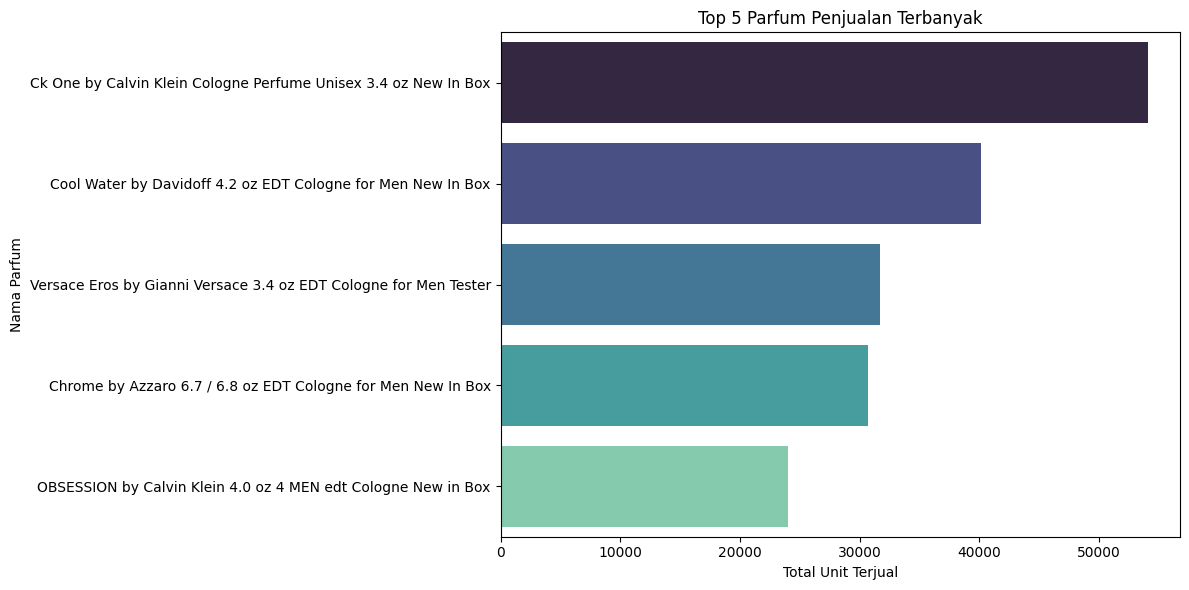

In [182]:
plt.figure(figsize=(12, 6))
sns.barplot(x='sold', y='title', data=most_sold.head(5), palette='mako')
plt.title('Top 5 Parfum Penjualan Terbanyak')
plt.xlabel('Total Unit Terjual')
plt.ylabel('Nama Parfum')
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan Parfum dengan title "Ck One by Calvin Klein COlogne Perfume Unisex 3.4 oz New In Box" memiliki penjualan terbanyak


Top 5 Parfum Paling Banyak Terjual Berdasrkan Tipe:
                                   type      sold
29                      Eau de Toilette  613394.0
25                        Eau de Parfum   54193.0
23                       Eau de Cologne   30907.0
8      Concentrated Uncut Pure Body Oil   18882.0
24  Eau de Cologne Spray, Cologne Spray    6634.0


<ipython-input-183-0017914983b8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sold', y='type', data=sold_by_type.head(5), palette='mako')


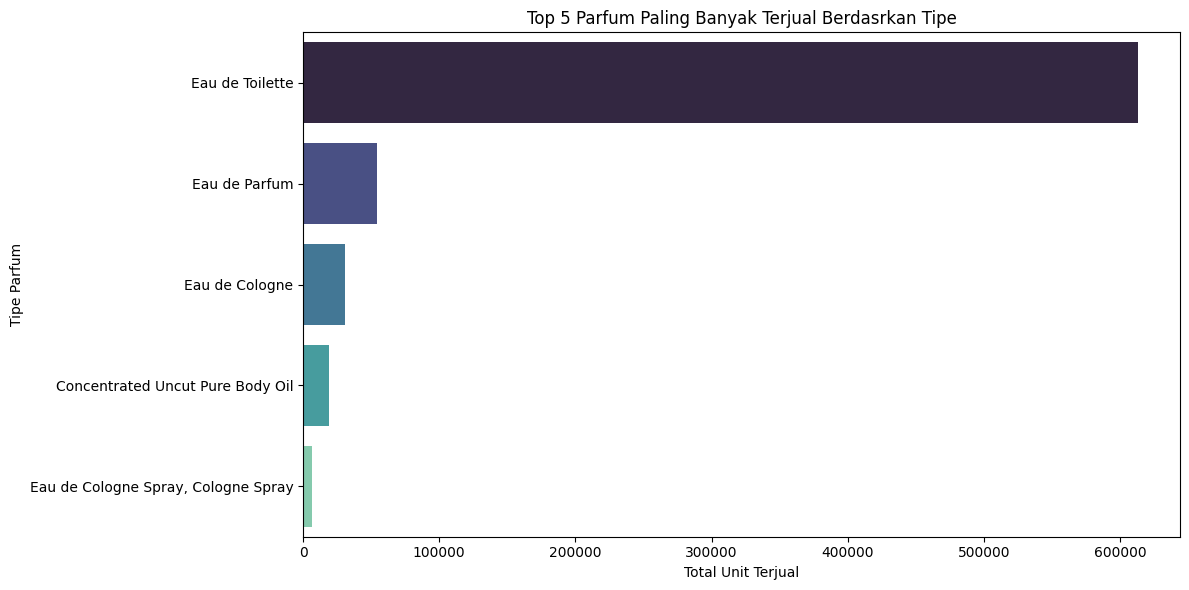

In [183]:
sold_by_type = data.groupby('type', as_index=False)['sold'].sum()

sold_by_type = sold_by_type.sort_values(by='sold', ascending=False)

print("\nTop 5 Parfum Paling Banyak Terjual Berdasrkan Tipe:")
print(sold_by_type.head(5))

plt.figure(figsize=(12, 6))
sns.barplot(x='sold', y='type', data=sold_by_type.head(5), palette='mako')
plt.title('Top 5 Parfum Paling Banyak Terjual Berdasrkan Tipe')
plt.xlabel('Total Unit Terjual')
plt.ylabel('Tipe Parfum')
plt.tight_layout()
plt.show()

Melihat data penjualan berdasarkan Tipe Parfum dan menampilkan 5 teratas dengan penjualan terbanyak dan menampilkan grafiknya. Berdasarkan Grafik di atas Parfum dengan Tipe "Eau de Toilette" paling banyak terjual ini berarti parfum dengan tipe tersebut banyak disukai.

In [184]:
brand_sales = data.groupby('brand')['sold'].sum().reset_index()
brand_sales_sorted = brand_sales.sort_values(by='sold', ascending=False)
print(brand_sales_sorted)

               brand     sold
48      Calvin Klein  97572.0
226          Versace  96519.0
65          Davidoff  54944.0
28            Azzaro  38305.0
19             Armaf  24282.0
..               ...      ...
39           Branded      1.0
214        The Baron      1.0
91   GIORGIO ARM.ANI      1.0
227    Victor & Rolf      1.0
93    GUERLAIN PARIS      1.0

[246 rows x 2 columns]


Menampilkan Data Penjualan terbanyak berdasarkan brand untuk melihat brand yang paling banyak dibeli

<ipython-input-185-9252bbd0bfaa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sold', y='brand', data=brand_sales_sorted.head(5), palette='viridis')


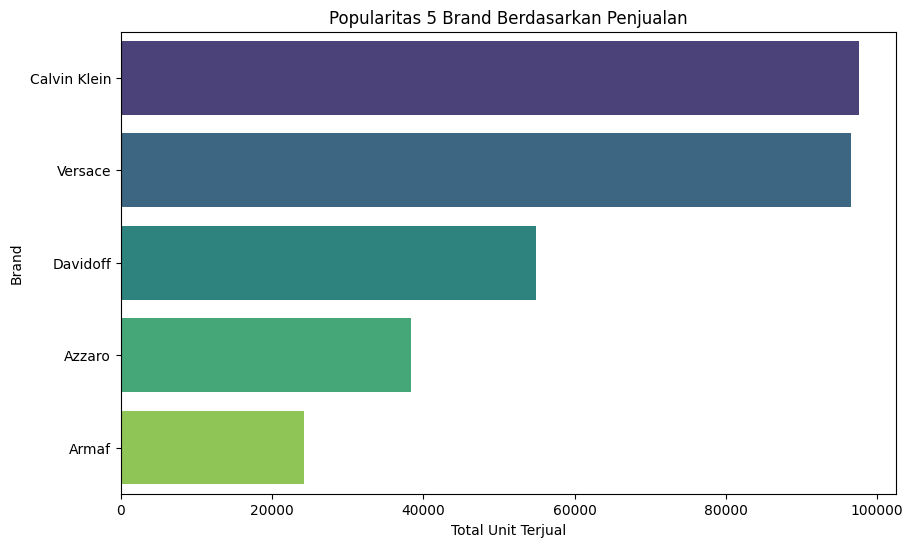

In [185]:
plt.figure(figsize=(10,6))
sns.barplot(x='sold', y='brand', data=brand_sales_sorted.head(5), palette='viridis')
plt.title('Popularitas 5 Brand Berdasarkan Penjualan')
plt.xlabel('Total Unit Terjual')
plt.ylabel('Brand')
plt.show()


Berdasarkan Grafik di atas brand Calvin Klein memiliki penjualan terbanyak disusul oleh brand Versace dengan selisih yang tidak terlalu signifikan. berdasarkan grafik tersebut brand Calvin Klein disukai banyak orang.

In [186]:
price_sales_corr = data[['price', 'sold']].corr()
print("Price vs. Sales Correlation:\n", price_sales_corr)

Price vs. Sales Correlation:
           price      sold
price  1.000000 -0.084666
sold  -0.084666  1.000000


Melihat Korelasi Harga dengan Penjualan

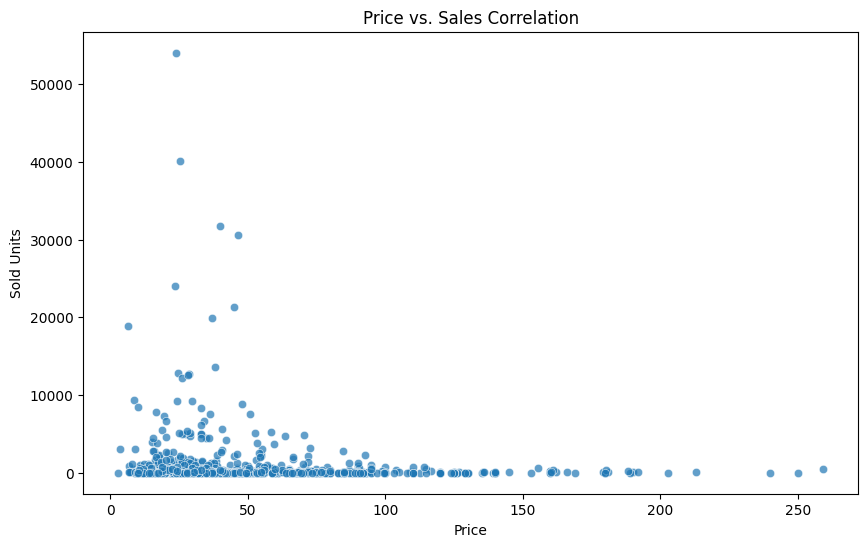

In [187]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='sold', data=data, alpha=0.7)
plt.title('Price vs. Sales Correlation')
plt.xlabel('Price')
plt.ylabel('Sold Units')
plt.show()

Berdasarkan Grafik di atas Parfum dengan harga mahal memiliki penjualan yang tidak terlalu banyak sedangkan parfung dengan rentang harga 0-50 memiliki penjualan yang cukup tinggi.

In [188]:
keywords = ['luxury', 'fresh', 'floral', 'elegant', 'premium']
keyword_sales = []
for keyword in keywords:
    filtered_data = data[data['title'].str.contains(keyword, case=False, na=False)]
    total_sales = filtered_data['sold'].sum()
    keyword_sales.append({'keyword': keyword, 'total_sales': total_sales})

Melihat Data penjualan berdasarkan keyword yang ada di title

In [189]:
keyword_sales_df = pd.DataFrame(keyword_sales)

<ipython-input-190-f4345da231f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='keyword', data=keyword_sales_df, palette='plasma')


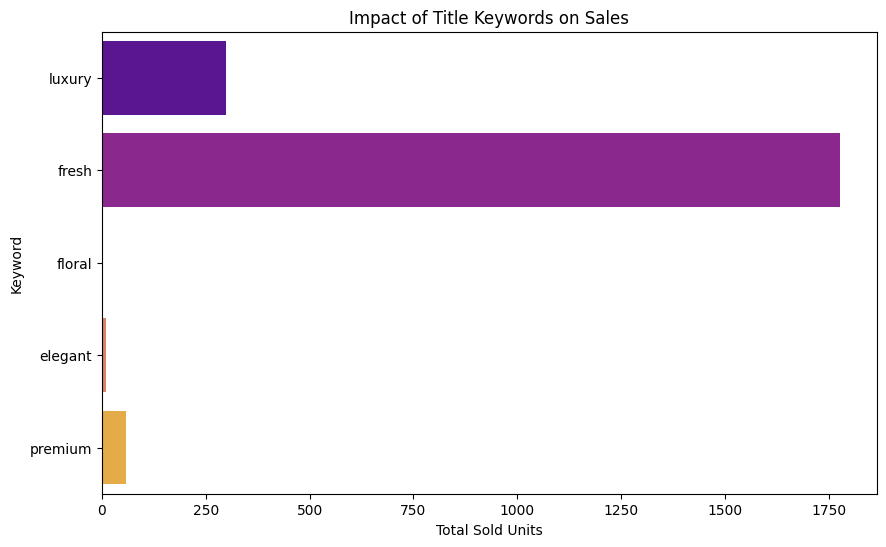

In [190]:
plt.figure(figsize=(10,6))
sns.barplot(x='total_sales', y='keyword', data=keyword_sales_df, palette='plasma')
plt.title('Impact of Title Keywords on Sales')
plt.xlabel('Total Sold Units')
plt.ylabel('Keyword')
plt.show()

Berdasarkan Grafik di atas Parfum yang memiliki title "fresh" memiliki penjualan yang tinggi dibandingkan yang lain. ini berarti pembeli menyukai parfum yang fresh.